**Import library**

In [5]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

**Load dataset**

In [6]:
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True)

In [7]:
# Load dataset
def load_data():
    data =pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/Corona_NLP_train.csv", engine='python')
    return data

In [8]:
tweet_df = load_data()
tweet_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
tweet_df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÜT: 36.319708,-82.363649",16-03-2020,As news of the regions first confirmed COVID-...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


**Experimental Setup**

In this step, we have to setup our research dataset. To put it more simply, first of all, we have to drop unnecessary columns, map the target variable, and remove null values. In this way, dataset will be ready for experiment.

**Drop Unnecessary columns**

In [10]:
tweet_df.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'], axis=1, inplace=True)

**Map the target variable**

In [11]:
d = {'Neutral': 0, 'Positive': 1, 'Extremely Positive': 2,'Extremely Negative': 3,'Negative': 4}
tweet_df['label'] = tweet_df['Sentiment'].map(d)

In [12]:
tweet_df.tail(10)

,OriginalTweet,Sentiment,label
41147,Yall really shitting that much more at home??...,Negative,4
41148,UV light Sterilizer Sanitizer for your mask an...,Extremely Positive,2
41149,Still shocked by the number of #Toronto superm...,Negative,4
41150,I never that wed be in a situation &amp; worl...,Positive,1
41151,@MrSilverScott you are definitely my man. I fe...,Extremely Positive,2
41152,Airline pilots offering to stock supermarket s...,Neutral,0
41153,Response to complaint not provided citing COVI...,Extremely Negative,3
41154,You know its getting tough when @KameronWilds...,Positive,1
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,0
41156,@TartiiCat Well new/used Rift S are going for ...,Negative,4


**Check how much null values we have**

In [13]:
tweet_df.isnull().sum()

OriginalTweet    0
Sentiment        0
label            0
dtype: int64

**Remove the null values from our dataset**

In [14]:
tweet_df= tweet_df.dropna()

In [15]:
tweet_df.isnull().sum()

OriginalTweet    0
Sentiment        0
label            0
dtype: int64

**Data Preparation** <br>
Data Preparation consists of Text preprocessing. Data also collected from various sources so it may contains numerous of noise that should be preprocessed in order to get better accuracy. We will be followed by the step for data preparation:

Step 1 : Converting html entities <br>
Step 2 : Removing "@user" from all the tweets <br>
Step 3 : Changing all the tweets into lowercase <br>
Step 4 : Apostrophe Lookup <br>
Step 5 : Short Word Lookup <br>
Step 6 : Emoticon Lookup <br>
Step 7 : Replacing Special Characters with space <br>
Step 8 : Replacing Numbers (integers) with space <br>
Step 9 : Removing words whom length is 1 <br>
Step 10 : Tokenization - Converting a sentence into list of words <br>
Step 11 : Remove stopwords <br>
Step 12 : Lammetization/stemming - Tranforming any form of a word to its root 
word <br>
Step 13: Removal URLS <br>
STEP 14: Removal HTML Taggs

**STEP A: Converting HTML entities**

In [17]:
print("""Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)""")

Step A : Converting html entities i.e. (&lt; &gt; &amp;)
( "&lt;" is converted to “<” and "&amp;" is converted to “&”)


In [84]:
# Importing HTMLParser
from html.parser import HTMLParser
html_parser = HTMLParser()

In [85]:
# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version
tweet_df['clean_tweet'] = tweet_df['OriginalTweet'].apply(lambda x: html_parser.unescape(x))
tweet_df.tail(10)

,OriginalTweet,Sentiment,label,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
41147,Yall really shitting that much more at home??...,Negative,4,Yall really shitting that much more at home??...,"[all, really, shitting, that, much, more, at, ...","[really, shitting, much, home, covid, coronavi...",realli shit much home covid coronaviru toiletpap,really shitting much home covid coronavirus to...
41148,UV light Sterilizer Sanitizer for your mask an...,Extremely Positive,2,UV light Sterilizer Sanitizer for your mask an...,"[uv, light, sterilizer, sanitizer, for, your, ...","[uv, light, sterilizer, sanitizer, mask, mobil...",uv light steril sanit mask mobil phone pl take...,uv light sterilizer sanitizer mask mobile phon...
41149,Still shocked by the number of #Toronto superm...,Negative,4,Still shocked by the number of #Toronto superm...,"[still, shocked, by, the, number, of, toronto,...","[still, shocked, number, toronto, supermarket,...",still shock number toronto supermarket employe...,still shocked number toronto supermarket emplo...
41150,I never that wed be in a situation &amp; worl...,Positive,1,I never that wed be in a situation & world th...,"[never, that, we, be, in, situation, world, th...","[never, situation, world, going, supermarket, ...",never situat world go supermarket pick packag ...,never situation world going supermarket pickin...
41151,@MrSilverScott you are definitely my man. I fe...,Extremely Positive,2,@MrSilverScott you are definitely my man. I fe...,"[you, are, definitely, my, man, feel, like, th...","[definitely, man, feel, like, fall, need, hono...",definit man feel like fall need honor hero cov...,definitely man feel like fall need honor hero ...
41152,Airline pilots offering to stock supermarket s...,Neutral,0,Airline pilots offering to stock supermarket s...,"[airline, pilots, offering, to, stock, superma...","[airline, pilots, offering, stock, supermarket...",airlin pilot offer stock supermarket shelv nz ...,airline pilot offering stock supermarket shelf...
41153,Response to complaint not provided citing COVI...,Extremely Negative,3,Response to complaint not provided citing COVI...,"[response, to, complaint, not, provided, citin...","[response, complaint, provided, citing, covid,...",respons complaint provid cite covid relat dela...,response complaint provided citing covid relat...
41154,You know its getting tough when @KameronWilds...,Positive,1,You know its getting tough when @KameronWilds...,"[you, know, it, getting, tough, when, is, rati...","[know, getting, tough, rationing, toilet, pape...",know get tough ration toilet paper coronaviru ...,know getting tough rationing toilet paper coro...
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,0,Is it wrong that the smell of hand sanitizer i...,"[is, it, wrong, that, the, smell, of, hand, sa...","[wrong, smell, hand, sanitizer, starting, turn...",wrong smell hand sanit start turn coronaviru c...,wrong smell hand sanitizer starting turn coron...
41156,@TartiiCat Well new/used Rift S are going for ...,Negative,4,@TartiiCat Well new/used Rift S are going for ...,"[well, new, used, rift, are, going, for, on, a...","[well, new, used, rift, going, amazon, rn, alt...",well new use rift go amazon rn although normal...,well new used rift going amazon rn although no...


**Remove HTML taggs**

In [81]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

text = """<div>
<h1> H2O</h1>
<p> AutoML</p>
<a href="https://www.h2o.ai/products/h2o-driverless-ai/"> Driverless AI</a>
</div>"""

print(remove_html(text))


 H2O
 AutoML
 Driverless AI



In [82]:
tweet_df['clean_tweet'] = tweet_df['OriginalTweet'].apply(lambda x: remove_html(x))
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,"[https, co, ifz, fan, pa, and, https, co, xx, ...","[https, co, ifz, fan, pa, https, co, xx, ghgfz...",http co ifz fan pa http co xx ghgfzcc http co ...,http co ifz fan pa http co xx ghgfzcc http co ...
1,advice Talk to your neighbours family to excha...,Positive,1,advice Talk to your neighbours family to excha...,"[advice, talk, to, your, neighbours, family, t...","[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,Coronavirus Australia: Woolworths to give elde...,"[coronavirus, australia, woolworths, to, give,...","[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,coronavirus australia woolworth give elderly d...
3,My food stock is not the only one which is emp...,Positive,1,My food stock is not the only one which is emp...,"[my, food, stock, is, not, the, only, one, whi...","[food, stock, one, empty, please, panic, enoug...",food stock one empti pleas panic enough food e...,food stock one empty please panic enough food ...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,"Me, ready to go at supermarket during the #COV...","[me, ready, to, go, at, supermarket, during, t...","[ready, go, supermarket, covid, outbreak, para...",readi go supermarket covid outbreak paranoid f...,ready go supermarket covid outbreak paranoid f...
5,As news of the regions first confirmed COVID-...,Positive,1,As news of the regions first confirmed COVID-...,"[as, news, of, the, region, first, confirmed, ...","[news, region, first, confirmed, covid, case, ...",news region first confirm covid case came sull...,news region first confirmed covid case came su...
6,Cashier at grocery store was sharing his insig...,Positive,1,Cashier at grocery store was sharing his insig...,"[cashier, at, grocery, store, was, sharing, hi...","[cashier, grocery, store, sharing, insights, c...",cashier groceri store share insight covid prov...,cashier grocery store sharing insight covid pr...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,Was at the supermarket today. Didn't buy toile...,"[was, at, the, supermarket, today, did, not, b...","[supermarket, today, buy, toilet, paper, rebel...",supermarket today buy toilet paper rebel toile...,supermarket today buy toilet paper rebel toile...
8,Due to COVID-19 our retail store and classroom...,Positive,1,Due to COVID-19 our retail store and classroom...,"[due, to, covid, our, retail, store, and, clas...","[due, covid, retail, store, classroom, atlanta...",due covid retail store classroom atlanta open ...,due covid retail store classroom atlanta open ...
9,"For corona prevention,we should stop to buy th...",Negative,4,"For corona prevention,we should stop to buy th...","[for, corona, prevention, we, should, stop, to...","[corona, prevention, stop, buy, things, cash, ...",corona prevent stop buy thing cash use onlin p...,corona prevention stop buy thing cash use onli...


**Step B : Removing "@user" from all the tweets**

In [123]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [124]:
# remove twitter handles (@user)
tweet_df['clean_tweet'] = np.vectorize(remove_pattern)(tweet_df['clean_tweet'], "@[\w]*")
tweet_df.tail(10)

,OriginalTweet,Sentiment,label,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
41147,Yall really shitting that much more at home??...,Negative,4,Yall really shitting that much more at home??...,"[Yall, really, shitting, that, much, more, at...","[Yall, really, shitting, much, home, ?, ?, #,...",yall realli shit much home ? ? # covid19 # co...,Yall really shitting much home ? ? # COVID19 ...
41148,UV light Sterilizer Sanitizer for your mask an...,Extremely Positive,2,UV light Sterilizer Sanitizer for your mask an...,"[UV, light, Sterilizer, Sanitizer, for, your, ...","[UV, light, Sterilizer, Sanitizer, mask, mobil...","UV light steril sanit mask mobil phone ? , pl ...",UV light Sterilizer Sanitizer mask mobile phon...
41149,Still shocked by the number of #Toronto superm...,Negative,4,Still shocked by the number of #Toronto superm...,"[Still, shocked, by, the, number, of, #, Toron...","[Still, shocked, number, #, Toronto, supermark...",still shock number # toronto supermarket emplo...,Still shocked number # Toronto supermarket emp...
41150,I never that wed be in a situation &amp; worl...,Positive,1,I never that wed be in a situation &amp; worl...,"[I, never, that, wed, be, in, a, situation, &...","[I, never, wed, situation, &, amp, ;, world, ...",I never wed situat & amp ; world go supermark...,I never wed situation & amp ; world going sup...
41151,@MrSilverScott you are definitely my man. I fe...,Extremely Positive,2,you are definitely my man. I feel like this f...,"[@, MrSilverScott, you, are, definitely, my, m...","[@, MrSilverScott, definitely, man, ., I, feel...",@ mrsilverscott definit man . I feel like fall...,@ MrSilverScott definitely man . I feel like f...
41152,Airline pilots offering to stock supermarket s...,Neutral,0,Airline pilots offering to stock supermarket s...,"[Airline, pilots, offering, to, stock, superma...","[Airline, pilots, offering, stock, supermarket...",airlin pilot offer stock supermarket shelv # N...,Airline pilot offering stock supermarket shelf...
41153,Response to complaint not provided citing COVI...,Extremely Negative,3,Response to complaint not provided citing COVI...,"[Response, to, complaint, not, provided, citin...","[Response, complaint, provided, citing, COVID-...",respons complaint provid cite covid-19 relat d...,Response complaint provided citing COVID-19 re...
41154,You know its getting tough when @KameronWilds...,Positive,1,You know its getting tough when is rationin...,"[You, know, its, getting, tough, when, @, Kam...","[You, know, its, getting, tough, @, KameronWi...",you know it get tough @ kameronwild ration to...,You know its getting tough @ KameronWilds rat...
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,0,Is it wrong that the smell of hand sanitizer i...,"[Is, it, wrong, that, the, smell, of, hand, sa...","[Is, wrong, smell, hand, sanitizer, starting, ...",Is wrong smell hand sanit start turn ? # coron...,Is wrong smell hand sanitizer starting turn ? ...
41156,@TartiiCat Well new/used Rift S are going for ...,Negative,4,Well new/used Rift S are going for $700.00 on...,"[@, TartiiCat, Well, new/used, Rift, S, are, g...","[@, TartiiCat, Well, new/used, Rift, S, going,...",@ tartiicat well new/us rift S go $ 700.00 ama...,@ TartiiCat Well new/used Rift S going $ 700.0...


**Step C : Changing all the tweets into lowercase**

In [127]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: x.lower())
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,and and,"[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, and,...","[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv]",@ menyrbi @ phil_gahan @ chrisitv,@ MeNyrbie @ Phil_Gahan @ Chrisitv
1,advice Talk to your neighbours family to excha...,Positive,1,advice talk to your neighbours family to excha...,"[advice, Talk, to, your, neighbours, family, t...","[advice, Talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia: woolworths to give elde...,"[Coronavirus, Australia, :, Woolworths, to, gi...","[Coronavirus, Australia, :, Woolworths, give, ...",coronaviru australia : woolworth give elderli ...,Coronavirus Australia : Woolworths give elderl...
3,My food stock is not the only one which is emp...,Positive,1,my food stock is not the only one which is emp...,"[My, food, stock, is, not, the, only, one, whi...","[My, food, stock, one, empty, ..., PLEASE, ,, ...","My food stock one empti ... pleas , n't panic ...","My food stock one empty ... PLEASE , n't panic..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,"me, ready to go at supermarket during the #cov...","[Me, ,, ready, to, go, at, supermarket, during...","[Me, ,, ready, go, supermarket, #, COVID19, ou...","Me , readi go supermarket # covid19 outbreak ....","Me , ready go supermarket # COVID19 outbreak ...."
5,As news of the regions first confirmed COVID-...,Positive,1,as news of the regions first confirmed covid-...,"[As, news, of, the, regions, first, confirmed...","[As, news, regions, first, confirmed, COVID-1...",As news region first confirm covid-19 case ca...,As news regions first confirmed COVID-19 case...
6,Cashier at grocery store was sharing his insig...,Positive,1,cashier at grocery store was sharing his insig...,"[Cashier, at, grocery, store, was, sharing, hi...","[Cashier, grocery, store, sharing, insights, #...",cashier groceri store share insight # covid_19...,Cashier grocery store sharing insight # Covid_...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,was at the supermarket today. didn't buy toile...,"[Was, at, the, supermarket, today, ., Did, n't...","[Was, supermarket, today, ., Did, n't, buy, to...",wa supermarket today . did n't buy toilet pape...,Was supermarket today . Did n't buy toilet pap...
8,Due to COVID-19 our retail store and classroom...,Positive,1,due to covid-19 our retail store and classroom...,"[Due, to, COVID-19, our, retail, store, and, c...","[Due, COVID-19, retail, store, classroom, Atla...",due covid-19 retail store classroom atlanta op...,Due COVID-19 retail store classroom Atlanta op...
9,"For corona prevention,we should stop to buy th...",Negative,4,"for corona prevention,we should stop to buy th...","[For, corona, prevention, ,, we, should, stop,...","[For, corona, prevention, ,, stop, buy, things...","for corona prevent , stop buy thing cash use o...","For corona prevention , stop buy thing cash us..."


**Step D : Apostrophe Lookup**

In [128]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [24]:
apostrophe_dict

{"'cause": 'because',
 "ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [129]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [130]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: lookup_dict(x,apostrophe_dict))
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,and and,"[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, and,...","[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv]",@ menyrbi @ phil_gahan @ chrisitv,@ MeNyrbie @ Phil_Gahan @ Chrisitv
1,advice Talk to your neighbours family to excha...,Positive,1,advice talk to your neighbours family to excha...,"[advice, Talk, to, your, neighbours, family, t...","[advice, Talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia: woolworths to give elde...,"[Coronavirus, Australia, :, Woolworths, to, gi...","[Coronavirus, Australia, :, Woolworths, give, ...",coronaviru australia : woolworth give elderli ...,Coronavirus Australia : Woolworths give elderl...
3,My food stock is not the only one which is emp...,Positive,1,my food stock is not the only one which is emp...,"[My, food, stock, is, not, the, only, one, whi...","[My, food, stock, one, empty, ..., PLEASE, ,, ...","My food stock one empti ... pleas , n't panic ...","My food stock one empty ... PLEASE , n't panic..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,"me, ready to go at supermarket during the #cov...","[Me, ,, ready, to, go, at, supermarket, during...","[Me, ,, ready, go, supermarket, #, COVID19, ou...","Me , readi go supermarket # covid19 outbreak ....","Me , ready go supermarket # COVID19 outbreak ...."
5,As news of the regions first confirmed COVID-...,Positive,1,as news of the regions first confirmed covid-...,"[As, news, of, the, regions, first, confirmed...","[As, news, regions, first, confirmed, COVID-1...",As news region first confirm covid-19 case ca...,As news regions first confirmed COVID-19 case...
6,Cashier at grocery store was sharing his insig...,Positive,1,cashier at grocery store was sharing his insig...,"[Cashier, at, grocery, store, was, sharing, hi...","[Cashier, grocery, store, sharing, insights, #...",cashier groceri store share insight # covid_19...,Cashier grocery store sharing insight # Covid_...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,was at the supermarket today. did not buy toil...,"[Was, at, the, supermarket, today, ., Did, n't...","[Was, supermarket, today, ., Did, n't, buy, to...",wa supermarket today . did n't buy toilet pape...,Was supermarket today . Did n't buy toilet pap...
8,Due to COVID-19 our retail store and classroom...,Positive,1,due to covid-19 our retail store and classroom...,"[Due, to, COVID-19, our, retail, store, and, c...","[Due, COVID-19, retail, store, classroom, Atla...",due covid-19 retail store classroom atlanta op...,Due COVID-19 retail store classroom Atlanta op...
9,"For corona prevention,we should stop to buy th...",Negative,4,"for corona prevention,we should stop to buy th...","[For, corona, prevention, ,, we, should, stop,...","[For, corona, prevention, ,, stop, buy, things...","for corona prevent , stop buy thing cash use o...","For corona prevention , stop buy thing cash us..."


**Step E : Short Word Lookup**

In [131]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [132]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: lookup_dict(x,short_word_dict))
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,and and,"[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, and,...","[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv]",@ menyrbi @ phil_gahan @ chrisitv,@ MeNyrbie @ Phil_Gahan @ Chrisitv
1,advice Talk to your neighbours family to excha...,Positive,1,advice talk to your neighbours family to excha...,"[advice, Talk, to, your, neighbours, family, t...","[advice, Talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia: woolworths to give elde...,"[Coronavirus, Australia, :, Woolworths, to, gi...","[Coronavirus, Australia, :, Woolworths, give, ...",coronaviru australia : woolworth give elderli ...,Coronavirus Australia : Woolworths give elderl...
3,My food stock is not the only one which is emp...,Positive,1,my food stock is not the only one which is emp...,"[My, food, stock, is, not, the, only, one, whi...","[My, food, stock, one, empty, ..., PLEASE, ,, ...","My food stock one empti ... pleas , n't panic ...","My food stock one empty ... PLEASE , n't panic..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,"me, ready to go at supermarket during the #cov...","[Me, ,, ready, to, go, at, supermarket, during...","[Me, ,, ready, go, supermarket, #, COVID19, ou...","Me , readi go supermarket # covid19 outbreak ....","Me , ready go supermarket # COVID19 outbreak ...."
5,As news of the regions first confirmed COVID-...,Positive,1,as news of the regions first confirmed covid-...,"[As, news, of, the, regions, first, confirmed...","[As, news, regions, first, confirmed, COVID-1...",As news region first confirm covid-19 case ca...,As news regions first confirmed COVID-19 case...
6,Cashier at grocery store was sharing his insig...,Positive,1,cashier at grocery store was sharing his insig...,"[Cashier, at, grocery, store, was, sharing, hi...","[Cashier, grocery, store, sharing, insights, #...",cashier groceri store share insight # covid_19...,Cashier grocery store sharing insight # Covid_...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,was at the supermarket today. did not buy toil...,"[Was, at, the, supermarket, today, ., Did, n't...","[Was, supermarket, today, ., Did, n't, buy, to...",wa supermarket today . did n't buy toilet pape...,Was supermarket today . Did n't buy toilet pap...
8,Due to COVID-19 our retail store and classroom...,Positive,1,due to covid-19 our retail store and classroom...,"[Due, to, COVID-19, our, retail, store, and, c...","[Due, COVID-19, retail, store, classroom, Atla...",due covid-19 retail store classroom atlanta op...,Due COVID-19 retail store classroom Atlanta op...
9,"For corona prevention,we should stop to buy th...",Negative,4,"for corona prevention,we should stop to buy th...","[For, corona, prevention, ,, we, should, stop,...","[For, corona, prevention, ,, stop, buy, things...","for corona prevent , stop buy thing cash use o...","For corona prevention , stop buy thing cash us..."


**Step F : Emoticon Lookup**

In [133]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [134]:
emoticon_dict

{'8-)': 'happy',
 ':(': 'sad',
 ':)': 'happy',
 ':-(': 'sad',
 ':-3': 'happy',
 ':-< ': 'sad',
 ':->': 'happy',
 ':-[': 'sad',
 ':-]': 'happy',
 ':-c': 'sad',
 ':-||': 'sad',
 ':-}': 'happy',
 ':<': 'sad',
 ':[': 'sad',
 ':^)': 'happy',
 ':c': 'sad',
 ':c)': 'happy',
 ':o)': 'happy',
 ':{': 'sad',
 ':‑)': 'happy',
 '<3': 'happy',
 '=)': 'happy',
 '=]': 'happy',
 '>:(': 'sad',
 '>:[': 'sad'}

In [135]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: lookup_dict(x,emoticon_dict))
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,and and,"[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, and,...","[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv]",@ menyrbi @ phil_gahan @ chrisitv,@ MeNyrbie @ Phil_Gahan @ Chrisitv
1,advice Talk to your neighbours family to excha...,Positive,1,advice talk to your neighbours family to excha...,"[advice, Talk, to, your, neighbours, family, t...","[advice, Talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia: woolworths to give elde...,"[Coronavirus, Australia, :, Woolworths, to, gi...","[Coronavirus, Australia, :, Woolworths, give, ...",coronaviru australia : woolworth give elderli ...,Coronavirus Australia : Woolworths give elderl...
3,My food stock is not the only one which is emp...,Positive,1,my food stock is not the only one which is emp...,"[My, food, stock, is, not, the, only, one, whi...","[My, food, stock, one, empty, ..., PLEASE, ,, ...","My food stock one empti ... pleas , n't panic ...","My food stock one empty ... PLEASE , n't panic..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,"me, ready to go at supermarket during the #cov...","[Me, ,, ready, to, go, at, supermarket, during...","[Me, ,, ready, go, supermarket, #, COVID19, ou...","Me , readi go supermarket # covid19 outbreak ....","Me , ready go supermarket # COVID19 outbreak ...."
5,As news of the regions first confirmed COVID-...,Positive,1,as news of the regions first confirmed covid-...,"[As, news, of, the, regions, first, confirmed...","[As, news, regions, first, confirmed, COVID-1...",As news region first confirm covid-19 case ca...,As news regions first confirmed COVID-19 case...
6,Cashier at grocery store was sharing his insig...,Positive,1,cashier at grocery store was sharing his insig...,"[Cashier, at, grocery, store, was, sharing, hi...","[Cashier, grocery, store, sharing, insights, #...",cashier groceri store share insight # covid_19...,Cashier grocery store sharing insight # Covid_...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,was at the supermarket today. did not buy toil...,"[Was, at, the, supermarket, today, ., Did, n't...","[Was, supermarket, today, ., Did, n't, buy, to...",wa supermarket today . did n't buy toilet pape...,Was supermarket today . Did n't buy toilet pap...
8,Due to COVID-19 our retail store and classroom...,Positive,1,due to covid-19 our retail store and classroom...,"[Due, to, COVID-19, our, retail, store, and, c...","[Due, COVID-19, retail, store, classroom, Atla...",due covid-19 retail store classroom atlanta op...,Due COVID-19 retail store classroom Atlanta op...
9,"For corona prevention,we should stop to buy th...",Negative,4,"for corona prevention,we should stop to buy th...","[For, corona, prevention, ,, we, should, stop,...","[For, corona, prevention, ,, stop, buy, things...","for corona prevent , stop buy thing cash use o...","For corona prevention , stop buy thing cash us..."


**Step G : ReplacingPunctuations with space**

In [136]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,and and,"[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, and,...","[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv]",@ menyrbi @ phil_gahan @ chrisitv,@ MeNyrbie @ Phil_Gahan @ Chrisitv
1,advice Talk to your neighbours family to excha...,Positive,1,advice talk to your neighbours family to excha...,"[advice, Talk, to, your, neighbours, family, t...","[advice, Talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia woolworths to give elde...,"[Coronavirus, Australia, :, Woolworths, to, gi...","[Coronavirus, Australia, :, Woolworths, give, ...",coronaviru australia : woolworth give elderli ...,Coronavirus Australia : Woolworths give elderl...
3,My food stock is not the only one which is emp...,Positive,1,my food stock is not the only one which is emp...,"[My, food, stock, is, not, the, only, one, whi...","[My, food, stock, one, empty, ..., PLEASE, ,, ...","My food stock one empti ... pleas , n't panic ...","My food stock one empty ... PLEASE , n't panic..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,me ready to go at supermarket during the cov...,"[Me, ,, ready, to, go, at, supermarket, during...","[Me, ,, ready, go, supermarket, #, COVID19, ou...","Me , readi go supermarket # covid19 outbreak ....","Me , ready go supermarket # COVID19 outbreak ...."
5,As news of the regions first confirmed COVID-...,Positive,1,as news of the region s first confirmed covid ...,"[As, news, of, the, regions, first, confirmed...","[As, news, regions, first, confirmed, COVID-1...",As news region first confirm covid-19 case ca...,As news regions first confirmed COVID-19 case...
6,Cashier at grocery store was sharing his insig...,Positive,1,cashier at grocery store was sharing his insig...,"[Cashier, at, grocery, store, was, sharing, hi...","[Cashier, grocery, store, sharing, insights, #...",cashier groceri store share insight # covid_19...,Cashier grocery store sharing insight # Covid_...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,was at the supermarket today did not buy toil...,"[Was, at, the, supermarket, today, ., Did, n't...","[Was, supermarket, today, ., Did, n't, buy, to...",wa supermarket today . did n't buy toilet pape...,Was supermarket today . Did n't buy toilet pap...
8,Due to COVID-19 our retail store and classroom...,Positive,1,due to covid 19 our retail store and classroom...,"[Due, to, COVID-19, our, retail, store, and, c...","[Due, COVID-19, retail, store, classroom, Atla...",due covid-19 retail store classroom atlanta op...,Due COVID-19 retail store classroom Atlanta op...
9,"For corona prevention,we should stop to buy th...",Negative,4,for corona prevention we should stop to buy th...,"[For, corona, prevention, ,, we, should, stop,...","[For, corona, prevention, ,, stop, buy, things...","for corona prevent , stop buy thing cash use o...","For corona prevention , stop buy thing cash us..."


**Step H : Replacing Special Characters with space**

In [150]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,MeNyrbie Phil Gahan Chrisitv and and,"[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, and,...","[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv]",@ menyrbi @ phil_gahan @ chrisitv,@ MeNyrbie @ Phil_Gahan @ Chrisitv
1,advice Talk to your neighbours family to excha...,Positive,1,advice Talk to your neighbours family to excha...,"[advice, Talk, to, your, neighbours, family, t...","[advice, Talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,Coronavirus Australia Woolworths to give elde...,"[Coronavirus, Australia, :, Woolworths, to, gi...","[Coronavirus, Australia, :, Woolworths, give, ...",coronaviru australia : woolworth give elderli ...,Coronavirus Australia : Woolworths give elderl...
3,My food stock is not the only one which is emp...,Positive,1,My food stock is not the only one which is emp...,"[My, food, stock, is, not, the, only, one, whi...","[My, food, stock, one, empty, ..., PLEASE, ,, ...","My food stock one empti ... pleas , n't panic ...","My food stock one empty ... PLEASE , n't panic..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,Me ready to go at supermarket during the COV...,"[Me, ,, ready, to, go, at, supermarket, during...","[Me, ,, ready, go, supermarket, #, COVID19, ou...","Me , readi go supermarket # covid19 outbreak ....","Me , ready go supermarket # COVID19 outbreak ...."
5,As news of the regions first confirmed COVID-...,Positive,1,As news of the region s first confirmed COVID ...,"[As, news, of, the, regions, first, confirmed...","[As, news, regions, first, confirmed, COVID-1...",As news region first confirm covid-19 case ca...,As news regions first confirmed COVID-19 case...
6,Cashier at grocery store was sharing his insig...,Positive,1,Cashier at grocery store was sharing his insig...,"[Cashier, at, grocery, store, was, sharing, hi...","[Cashier, grocery, store, sharing, insights, #...",cashier groceri store share insight # covid_19...,Cashier grocery store sharing insight # Covid_...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,Was at the supermarket today Didn t buy toile...,"[Was, at, the, supermarket, today, ., Did, n't...","[Was, supermarket, today, ., Did, n't, buy, to...",wa supermarket today . did n't buy toilet pape...,Was supermarket today . Did n't buy toilet pap...
8,Due to COVID-19 our retail store and classroom...,Positive,1,Due to COVID 19 our retail store and classroom...,"[Due, to, COVID-19, our, retail, store, and, c...","[Due, COVID-19, retail, store, classroom, Atla...",due covid-19 retail store classroom atlanta op...,Due COVID-19 retail store classroom Atlanta op...
9,"For corona prevention,we should stop to buy th...",Negative,4,For corona prevention we should stop to buy th...,"[For, corona, prevention, ,, we, should, stop,...","[For, corona, prevention, ,, stop, buy, things...","for corona prevent , stop buy thing cash use o...","For corona prevention , stop buy thing cash us..."


**Step I : Replacing Numbers (integers) with space**

In [151]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,MeNyrbie Phil Gahan Chrisitv and and,"[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, and,...","[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv]",@ menyrbi @ phil_gahan @ chrisitv,@ MeNyrbie @ Phil_Gahan @ Chrisitv
1,advice Talk to your neighbours family to excha...,Positive,1,advice Talk to your neighbours family to excha...,"[advice, Talk, to, your, neighbours, family, t...","[advice, Talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,Coronavirus Australia Woolworths to give elde...,"[Coronavirus, Australia, :, Woolworths, to, gi...","[Coronavirus, Australia, :, Woolworths, give, ...",coronaviru australia : woolworth give elderli ...,Coronavirus Australia : Woolworths give elderl...
3,My food stock is not the only one which is emp...,Positive,1,My food stock is not the only one which is emp...,"[My, food, stock, is, not, the, only, one, whi...","[My, food, stock, one, empty, ..., PLEASE, ,, ...","My food stock one empti ... pleas , n't panic ...","My food stock one empty ... PLEASE , n't panic..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,Me ready to go at supermarket during the COV...,"[Me, ,, ready, to, go, at, supermarket, during...","[Me, ,, ready, go, supermarket, #, COVID19, ou...","Me , readi go supermarket # covid19 outbreak ....","Me , ready go supermarket # COVID19 outbreak ...."
5,As news of the regions first confirmed COVID-...,Positive,1,As news of the region s first confirmed COVID ...,"[As, news, of, the, regions, first, confirmed...","[As, news, regions, first, confirmed, COVID-1...",As news region first confirm covid-19 case ca...,As news regions first confirmed COVID-19 case...
6,Cashier at grocery store was sharing his insig...,Positive,1,Cashier at grocery store was sharing his insig...,"[Cashier, at, grocery, store, was, sharing, hi...","[Cashier, grocery, store, sharing, insights, #...",cashier groceri store share insight # covid_19...,Cashier grocery store sharing insight # Covid_...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,Was at the supermarket today Didn t buy toile...,"[Was, at, the, supermarket, today, ., Did, n't...","[Was, supermarket, today, ., Did, n't, buy, to...",wa supermarket today . did n't buy toilet pape...,Was supermarket today . Did n't buy toilet pap...
8,Due to COVID-19 our retail store and classroom...,Positive,1,Due to COVID our retail store and classroom...,"[Due, to, COVID-19, our, retail, store, and, c...","[Due, COVID-19, retail, store, classroom, Atla...",due covid-19 retail store classroom atlanta op...,Due COVID-19 retail store classroom Atlanta op...
9,"For corona prevention,we should stop to buy th...",Negative,4,For corona prevention we should stop to buy th...,"[For, corona, prevention, ,, we, should, stop,...","[For, corona, prevention, ,, stop, buy, things...","for corona prevent , stop buy thing cash use o...","For corona prevention , stop buy thing cash us..."


**Step J : Removing words whom length is 1**

In [139]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
tweet_df['clean_tweet'][0:5]

0                                              and and
1    advice talk to your neighbours family to excha...
2    coronavirus australia woolworths to give elder...
3    my food stock is not the only one which is emp...
4    me ready to go at supermarket during the covid...
Name: clean_tweet, dtype: object

**Remove URL from Text**

In [142]:
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [152]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: remove_urls(x))
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,MeNyrbie Phil Gahan Chrisitv and and,"[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv, and,...","[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv]",@ menyrbi @ phil_gahan @ chrisitv,@ MeNyrbie @ Phil_Gahan @ Chrisitv
1,advice Talk to your neighbours family to excha...,Positive,1,advice Talk to your neighbours family to excha...,"[advice, Talk, to, your, neighbours, family, t...","[advice, Talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,Coronavirus Australia Woolworths to give elde...,"[Coronavirus, Australia, :, Woolworths, to, gi...","[Coronavirus, Australia, :, Woolworths, give, ...",coronaviru australia : woolworth give elderli ...,Coronavirus Australia : Woolworths give elderl...
3,My food stock is not the only one which is emp...,Positive,1,My food stock is not the only one which is emp...,"[My, food, stock, is, not, the, only, one, whi...","[My, food, stock, one, empty, ..., PLEASE, ,, ...","My food stock one empti ... pleas , n't panic ...","My food stock one empty ... PLEASE , n't panic..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,Me ready to go at supermarket during the COV...,"[Me, ,, ready, to, go, at, supermarket, during...","[Me, ,, ready, go, supermarket, #, COVID19, ou...","Me , readi go supermarket # covid19 outbreak ....","Me , ready go supermarket # COVID19 outbreak ...."
5,As news of the regions first confirmed COVID-...,Positive,1,As news of the region s first confirmed COVID ...,"[As, news, of, the, regions, first, confirmed...","[As, news, regions, first, confirmed, COVID-1...",As news region first confirm covid-19 case ca...,As news regions first confirmed COVID-19 case...
6,Cashier at grocery store was sharing his insig...,Positive,1,Cashier at grocery store was sharing his insig...,"[Cashier, at, grocery, store, was, sharing, hi...","[Cashier, grocery, store, sharing, insights, #...",cashier groceri store share insight # covid_19...,Cashier grocery store sharing insight # Covid_...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,Was at the supermarket today Didn t buy toile...,"[Was, at, the, supermarket, today, ., Did, n't...","[Was, supermarket, today, ., Did, n't, buy, to...",wa supermarket today . did n't buy toilet pape...,Was supermarket today . Did n't buy toilet pap...
8,Due to COVID-19 our retail store and classroom...,Positive,1,Due to COVID our retail store and classroom...,"[Due, to, COVID-19, our, retail, store, and, c...","[Due, COVID-19, retail, store, classroom, Atla...",due covid-19 retail store classroom atlanta op...,Due COVID-19 retail store classroom Atlanta op...
9,"For corona prevention,we should stop to buy th...",Negative,4,For corona prevention we should stop to buy th...,"[For, corona, prevention, ,, we, should, stop,...","[For, corona, prevention, ,, stop, buy, things...","for corona prevent , stop buy thing cash use o...","For corona prevention , stop buy thing cash us..."


**Step K : Spelling Correction - With TextBlob Library**

In [153]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [154]:
# Spelling correction is a cool feature which TextBlob offers, we can be accessed using the correct function as shown below.
blob = TextBlob("Why are you stting on this bech??") # Scentence with two errors
print(blob.correct()) # Correct function give us the best possible word simmilar to "gret"

Why are you sitting on this bench??


In [155]:
# we can see all the similar matches our first error along with the probability score.
blob.words[3].spellcheck()

[('sitting', 0.8078078078078078),
 ('setting', 0.11411411411411411),
 ('string', 0.036036036036036036),
 ('sting', 0.02702702702702703),
 ('stating', 0.015015015015015015)]

**Applying TextBlob on our data set - Spelling correction**

In [156]:
# Not cleaning the just showing the spelling check as its take lot of time to process all these tweets
## Shown sample how its must done
text = tweet_df['clean_tweet'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text

0            MeNyrbie  Phil Mahan  Chrisitv  and  and 
1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia  Woolworths to give elde...
3    By food stock is not the only one which is emp...
4    He  ready to go at supermarket during the  COV...
5    Is news of the region s first confirmed COVID ...
6    Cashier at grocer store was sharing his insigh...
7    Was at the supermarket today  Didn t buy toile...
8    Due to COVID    our retail store and classroom...
9    For corona prevention we should stop to buy th...
Name: clean_tweet, dtype: object

In [157]:
# Importing stop words from NLTK coupus and word tokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [159]:
# Creating token for the clean tweets
tweet_df['tweet_token'] = tweet_df['clean_tweet'].apply(lambda x: word_tokenize(x))
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,MeNyrbie Phil Gahan Chrisitv and and,"[MeNyrbie, Phil, Gahan, Chrisitv, and, and]","[@, MeNyrbie, @, Phil_Gahan, @, Chrisitv]",@ menyrbi @ phil_gahan @ chrisitv,@ MeNyrbie @ Phil_Gahan @ Chrisitv
1,advice Talk to your neighbours family to excha...,Positive,1,advice Talk to your neighbours family to excha...,"[advice, Talk, to, your, neighbours, family, t...","[advice, Talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,Coronavirus Australia Woolworths to give elde...,"[Coronavirus, Australia, Woolworths, to, give,...","[Coronavirus, Australia, :, Woolworths, give, ...",coronaviru australia : woolworth give elderli ...,Coronavirus Australia : Woolworths give elderl...
3,My food stock is not the only one which is emp...,Positive,1,My food stock is not the only one which is emp...,"[My, food, stock, is, not, the, only, one, whi...","[My, food, stock, one, empty, ..., PLEASE, ,, ...","My food stock one empti ... pleas , n't panic ...","My food stock one empty ... PLEASE , n't panic..."
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,Me ready to go at supermarket during the COV...,"[Me, ready, to, go, at, supermarket, during, t...","[Me, ,, ready, go, supermarket, #, COVID19, ou...","Me , readi go supermarket # covid19 outbreak ....","Me , ready go supermarket # COVID19 outbreak ...."
5,As news of the regions first confirmed COVID-...,Positive,1,As news of the region s first confirmed COVID ...,"[As, news, of, the, region, s, first, confirme...","[As, news, regions, first, confirmed, COVID-1...",As news region first confirm covid-19 case ca...,As news regions first confirmed COVID-19 case...
6,Cashier at grocery store was sharing his insig...,Positive,1,Cashier at grocery store was sharing his insig...,"[Cashier, at, grocery, store, was, sharing, hi...","[Cashier, grocery, store, sharing, insights, #...",cashier groceri store share insight # covid_19...,Cashier grocery store sharing insight # Covid_...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,Was at the supermarket today Didn t buy toile...,"[Was, at, the, supermarket, today, Didn, t, bu...","[Was, supermarket, today, ., Did, n't, buy, to...",wa supermarket today . did n't buy toilet pape...,Was supermarket today . Did n't buy toilet pap...
8,Due to COVID-19 our retail store and classroom...,Positive,1,Due to COVID our retail store and classroom...,"[Due, to, COVID, our, retail, store, and, clas...","[Due, COVID-19, retail, store, classroom, Atla...",due covid-19 retail store classroom atlanta op...,Due COVID-19 retail store classroom Atlanta op...
9,"For corona prevention,we should stop to buy th...",Negative,4,For corona prevention we should stop to buy th...,"[For, corona, prevention, we, should, stop, to...","[For, corona, prevention, ,, stop, buy, things...","for corona prevent , stop buy thing cash use o...","For corona prevention , stop buy thing cash us..."


In [160]:
# Importing stop words from NLTK corpus for english language
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [161]:
# Created new columns of tokens - where stop words are being removed
tweet_df['tweet_token_filtered'] = tweet_df['tweet_token'].apply(lambda x: [word for word in x if not word in stop_words])

## Tokens columns with stop words and without stop words
tweet_df[['tweet_token', 'tweet_token_filtered']].head(10)

,tweet_token,tweet_token_filtered
0,"[MeNyrbie, Phil, Gahan, Chrisitv, and, and]","[MeNyrbie, Phil, Gahan, Chrisitv]"
1,"[advice, Talk, to, your, neighbours, family, t...","[advice, Talk, neighbours, family, exchange, p..."
2,"[Coronavirus, Australia, Woolworths, to, give,...","[Coronavirus, Australia, Woolworths, give, eld..."
3,"[My, food, stock, is, not, the, only, one, whi...","[My, food, stock, one, empty, PLEASE, panic, T..."
4,"[Me, ready, to, go, at, supermarket, during, t...","[Me, ready, go, supermarket, COVID, outbreak, ..."
5,"[As, news, of, the, region, s, first, confirme...","[As, news, region, first, confirmed, COVID, ca..."
6,"[Cashier, at, grocery, store, was, sharing, hi...","[Cashier, grocery, store, sharing, insights, C..."
7,"[Was, at, the, supermarket, today, Didn, t, bu...","[Was, supermarket, today, Didn, buy, toilet, p..."
8,"[Due, to, COVID, our, retail, store, and, clas...","[Due, COVID, retail, store, classroom, Atlanta..."
9,"[For, corona, prevention, we, should, stop, to...","[For, corona, prevention, stop, buy, things, c..."


**We will create 2 new columns**

*   One For Stemming
*   Second For Lemmatization

The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

In [45]:
#Stemming - Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

In [162]:
# Importing library for stemming
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [163]:
# Created one more columns tweet_stemmed it shows tweets' stemmed version
tweet_df['tweet_stemmed'] = tweet_df['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
tweet_df['tweet_stemmed'].head(10)

0                          menyrbi phil gahan chrisitv
1    advic talk neighbour famili exchang phone numb...
2    coronaviru australia woolworth give elderli di...
3    My food stock one empti pleas panic there will...
4    Me readi go supermarket covid outbreak not I p...
5    As news region first confirm covid case came s...
6    cashier groceri store share insight covid To p...
7    wa supermarket today didn buy toilet paper reb...
8    due covid retail store classroom atlanta open ...
9    for corona prevent stop buy thing cash use onl...
Name: tweet_stemmed, dtype: object

Lemmatization - Lemmatization is the process of converting a word to its base form.

In [164]:
# Importing library for lemmatizing
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [165]:
# Created one more columns tweet_lemmatized it shows tweets' lemmatized version
tweet_df['tweet_lemmatized'] = tweet_df['tweet_token_filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))
tweet_df['tweet_lemmatized'].head(10)

0                         MeNyrbie Phil Gahan Chrisitv
1    advice Talk neighbour family exchange phone nu...
2    Coronavirus Australia Woolworths give elderly ...
3    My food stock one empty PLEASE panic THERE WIL...
4    Me ready go supermarket COVID outbreak Not I p...
5    As news region first confirmed COVID case came...
6    Cashier grocery store sharing insight Covid To...
7    Was supermarket today Didn buy toilet paper Re...
8    Due COVID retail store classroom Atlanta open ...
9    For corona prevention stop buy thing cash use ...
Name: tweet_lemmatized, dtype: object

In [166]:
# Our final dataframe - Fully formatted, Processed, Noise less, Cleaned, ready to analyse
## for further analysis we consider 2 columns i.e. "tweet_stemmed" & "tweet_lematized"
### We are using 2 columns to see which of them give us better score.
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,MeNyrbie Phil Gahan Chrisitv and and,"[MeNyrbie, Phil, Gahan, Chrisitv, and, and]","[MeNyrbie, Phil, Gahan, Chrisitv]",menyrbi phil gahan chrisitv,MeNyrbie Phil Gahan Chrisitv
1,advice Talk to your neighbours family to excha...,Positive,1,advice Talk to your neighbours family to excha...,"[advice, Talk, to, your, neighbours, family, t...","[advice, Talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,Coronavirus Australia Woolworths to give elde...,"[Coronavirus, Australia, Woolworths, to, give,...","[Coronavirus, Australia, Woolworths, give, eld...",coronaviru australia woolworth give elderli di...,Coronavirus Australia Woolworths give elderly ...
3,My food stock is not the only one which is emp...,Positive,1,My food stock is not the only one which is emp...,"[My, food, stock, is, not, the, only, one, whi...","[My, food, stock, one, empty, PLEASE, panic, T...",My food stock one empti pleas panic there will...,My food stock one empty PLEASE panic THERE WIL...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,Me ready to go at supermarket during the COV...,"[Me, ready, to, go, at, supermarket, during, t...","[Me, ready, go, supermarket, COVID, outbreak, ...",Me readi go supermarket covid outbreak not I p...,Me ready go supermarket COVID outbreak Not I p...
5,As news of the regions first confirmed COVID-...,Positive,1,As news of the region s first confirmed COVID ...,"[As, news, of, the, region, s, first, confirme...","[As, news, region, first, confirmed, COVID, ca...",As news region first confirm covid case came s...,As news region first confirmed COVID case came...
6,Cashier at grocery store was sharing his insig...,Positive,1,Cashier at grocery store was sharing his insig...,"[Cashier, at, grocery, store, was, sharing, hi...","[Cashier, grocery, store, sharing, insights, C...",cashier groceri store share insight covid To p...,Cashier grocery store sharing insight Covid To...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,Was at the supermarket today Didn t buy toile...,"[Was, at, the, supermarket, today, Didn, t, bu...","[Was, supermarket, today, Didn, buy, toilet, p...",wa supermarket today didn buy toilet paper reb...,Was supermarket today Didn buy toilet paper Re...
8,Due to COVID-19 our retail store and classroom...,Positive,1,Due to COVID our retail store and classroom...,"[Due, to, COVID, our, retail, store, and, clas...","[Due, COVID, retail, store, classroom, Atlanta...",due covid retail store classroom atlanta open ...,Due COVID retail store classroom Atlanta open ...
9,"For corona prevention,we should stop to buy th...",Negative,4,For corona prevention we should stop to buy th...,"[For, corona, prevention, we, should, stop, to...","[For, corona, prevention, stop, buy, things, c...",for corona prevent stop buy thing cash use onl...,For corona prevention stop buy thing cash use ...


Now When Our Data Is Cleaned & Ready We Start Our Text Analysis

* We will do our analysis on two columns i.e. "tweet_stemmed" & "tweet_lematized"
* Will see the most commonly used words for both the columns i.e. "tweet_stemmed" & "tweet_lematized"

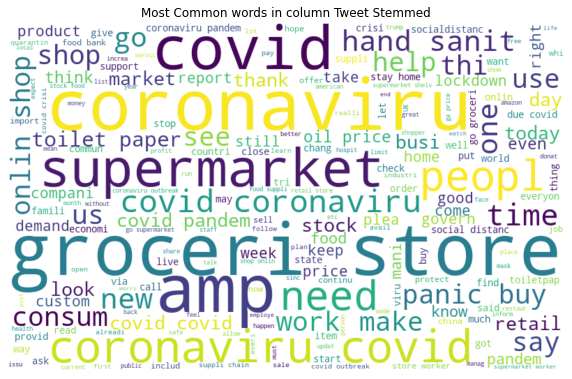

In [170]:
#visualizing all the words in column "tweet_stemmed" in our data using the wordcloud plot.
all_words = ' '.join([text for text in tweet_df['tweet_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

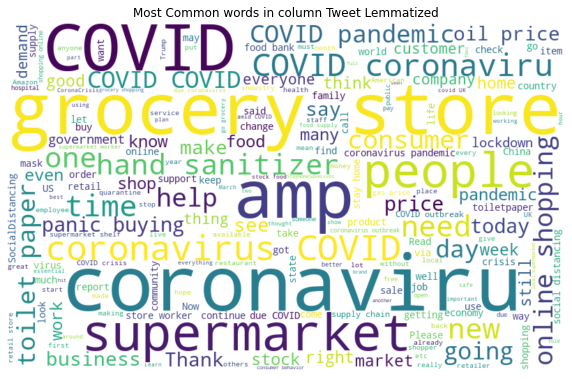

In [169]:
#Visualizing all the words in column "tweet_lemmatized" in our data using the wordcloud plot.
all_words = ' '.join([text for text in tweet_df['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmatized")
plt.show()

**Most common words in non racist/sexist tweets**

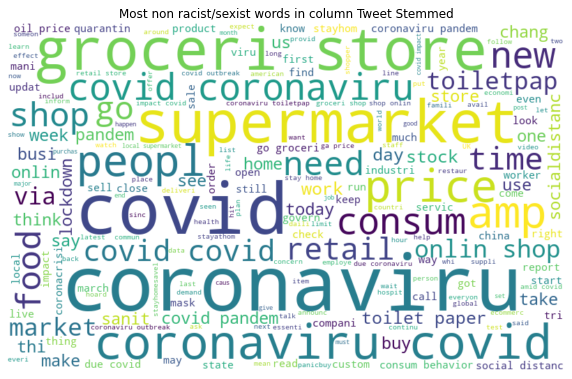

In [171]:
#Visualizing all the normal or non racist/sexist words in column "tweet_stemmed" in our data using the wordcloud plot.
normal_words =' '.join([text for text in tweet_df['tweet_stemmed'][tweet_df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Stemmed")
plt.show()

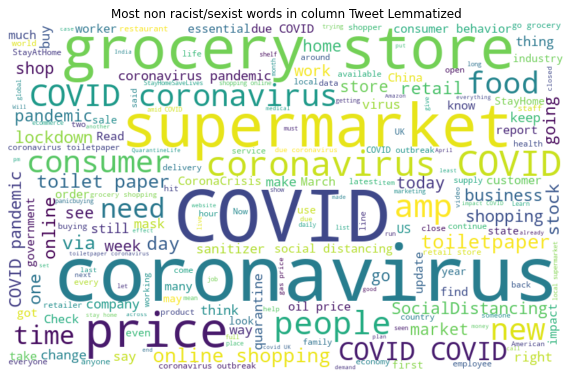

In [172]:
#Visualizing all the normal or non racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
normal_words =' '.join([text for text in tweet_df['tweet_lemmatized'][tweet_df['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Lemmatized")
plt.show()

In above plots we can see most of the words are positive or neutral. With happy and love being the most frequent ones

**Most common words in racist/sexist tweets**

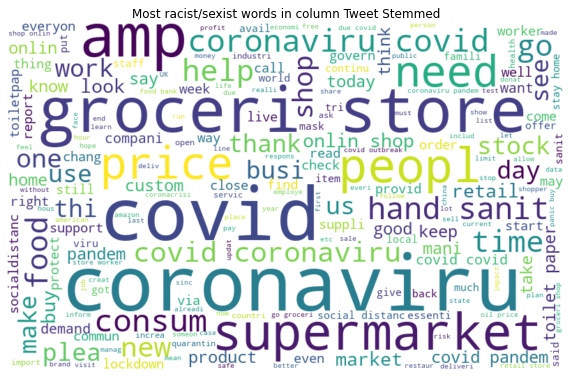

In [173]:
#Visualizing all the negative or racist/sexist words in column "tweet_stemmed" in our data using the wordcloud plot.
negative_words =' '.join([text for text in tweet_df['tweet_stemmed'][tweet_df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column Tweet Stemmed")
plt.show()

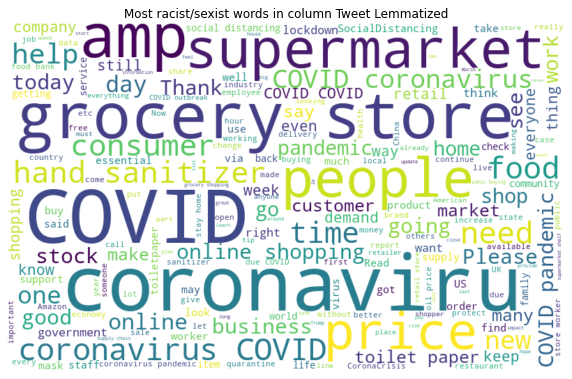

In [174]:
#Visualizing all the negative or racist/sexist words in column "tweet_lemmatized" in our data using the wordcloud plot.
negative_words =' '.join([text for text in tweet_df['tweet_lemmatized'][tweet_df['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column Tweet Lemmatized")
plt.show()

In above plots we can see most of the words are negative or racist/sexist. With racist, hate and black being the most frequent ones.

In [175]:
tweet_df.head(10)

,OriginalTweet,Sentiment,label,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,MeNyrbie Phil Gahan Chrisitv and and,"[MeNyrbie, Phil, Gahan, Chrisitv, and, and]","[MeNyrbie, Phil, Gahan, Chrisitv]",menyrbi phil gahan chrisitv,MeNyrbie Phil Gahan Chrisitv
1,advice Talk to your neighbours family to excha...,Positive,1,advice Talk to your neighbours family to excha...,"[advice, Talk, to, your, neighbours, family, t...","[advice, Talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,advice Talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,1,Coronavirus Australia Woolworths to give elde...,"[Coronavirus, Australia, Woolworths, to, give,...","[Coronavirus, Australia, Woolworths, give, eld...",coronaviru australia woolworth give elderli di...,Coronavirus Australia Woolworths give elderly ...
3,My food stock is not the only one which is emp...,Positive,1,My food stock is not the only one which is emp...,"[My, food, stock, is, not, the, only, one, whi...","[My, food, stock, one, empty, PLEASE, panic, T...",My food stock one empti pleas panic there will...,My food stock one empty PLEASE panic THERE WIL...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,3,Me ready to go at supermarket during the COV...,"[Me, ready, to, go, at, supermarket, during, t...","[Me, ready, go, supermarket, COVID, outbreak, ...",Me readi go supermarket covid outbreak not I p...,Me ready go supermarket COVID outbreak Not I p...
5,As news of the regions first confirmed COVID-...,Positive,1,As news of the region s first confirmed COVID ...,"[As, news, of, the, region, s, first, confirme...","[As, news, region, first, confirmed, COVID, ca...",As news region first confirm covid case came s...,As news region first confirmed COVID case came...
6,Cashier at grocery store was sharing his insig...,Positive,1,Cashier at grocery store was sharing his insig...,"[Cashier, at, grocery, store, was, sharing, hi...","[Cashier, grocery, store, sharing, insights, C...",cashier groceri store share insight covid To p...,Cashier grocery store sharing insight Covid To...
7,Was at the supermarket today. Didn't buy toile...,Neutral,0,Was at the supermarket today Didn t buy toile...,"[Was, at, the, supermarket, today, Didn, t, bu...","[Was, supermarket, today, Didn, buy, toilet, p...",wa supermarket today didn buy toilet paper reb...,Was supermarket today Didn buy toilet paper Re...
8,Due to COVID-19 our retail store and classroom...,Positive,1,Due to COVID our retail store and classroom...,"[Due, to, COVID, our, retail, store, and, clas...","[Due, COVID, retail, store, classroom, Atlanta...",due covid retail store classroom atlanta open ...,Due COVID retail store classroom Atlanta open ...
9,"For corona prevention,we should stop to buy th...",Negative,4,For corona prevention we should stop to buy th...,"[For, corona, prevention, we, should, stop, to...","[For, corona, prevention, stop, buy, things, c...",for corona prevent stop buy thing cash use onl...,For corona prevention stop buy thing cash use ...


**A - Bag-of-Words Features**

In [58]:
# Importing library
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=1000, min_df=2,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

**A.1 Bag-Of-Words feature matrix - For columns "combine_df['tweet_stemmed']"**

In [59]:
# bag-of-words feature matrix - For columns "combine_df['tweet_stemmed']"
bow_stem = bow_vectorizer.fit_transform(tweet_df['tweet_stemmed'])
bow_stem

<41157x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 472415 stored elements in Compressed Sparse Row format>

**A.2 Bag-Of-Words feature matrix - For column - combine_df['tweet_lemmatized']**

In [60]:
# bag-of-words feature matrix - For column - combine_df['tweet_lemmatized']
bow_lemm = bow_vectorizer.fit_transform(tweet_df['tweet_lemmatized'])
bow_lemm

<41157x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 432392 stored elements in Compressed Sparse Row format>

**B - TF-IDF Features**

In [61]:
# Importing library
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=1000,
                min_df=2, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

**B.1 TF-IDF feature matrix - For columns "combine_df['tweet_stemmed']"**

In [62]:
# TF-IDF feature matrix - For columns "combine_df['tweet_stemmed']"
tfidf_stem = tfidf_vectorizer.fit_transform(tweet_df['tweet_stemmed'])
tfidf_stem

<41157x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 472415 stored elements in Compressed Sparse Row format>

**B.2 TF-IDF feature matrix - For columns "combine_df['tweet_lemmatized']"**

In [63]:
# TF-IDF feature matrix - For columns "combine_df['tweet_lemmatized']"
tfidf_lemm = tfidf_vectorizer.fit_transform(tweet_df['tweet_lemmatized'])
tfidf_lemm

<41157x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 432392 stored elements in Compressed Sparse Row format>

**Saving the processing file into the google drive's folder**

In [177]:

# # saving the dataframe 
# tweet_df.to_csv('/content/drive/My Drive/Colab Notebooks/Data/tweet_covid_processing_file.csv')